# Preprocessing

In [263]:
#imports
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score,accuracy_score,confusion_matrix,roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/micha/Downloads/data.csv")
#print(data)
#sns.pairplot(data, hue='diagnosis')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Dropping the id column and the last one with NaN values**

In [4]:
df=data.drop(columns=['id','Unnamed: 32'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Information about the datas:**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Further infos:**

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


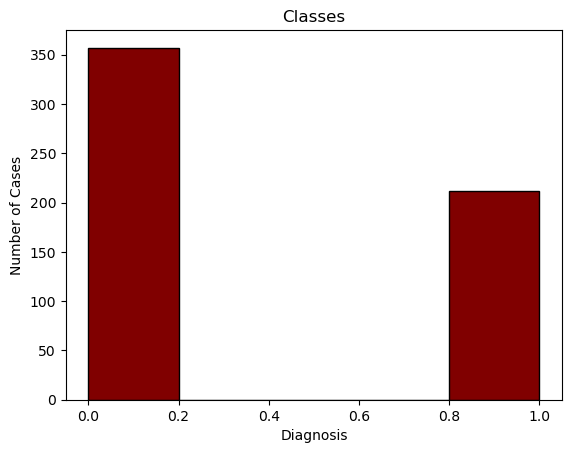

In [82]:
plt.hist(df['diagnosis'],bins=5,color='maroon',edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Cases')
plt.title('Classes')
plt.show()

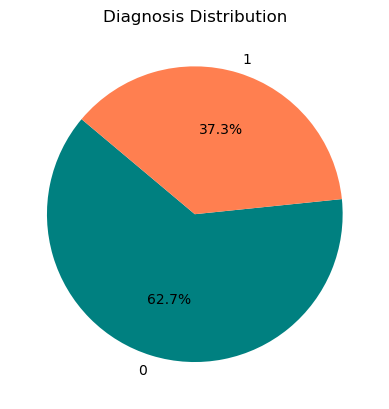

In [75]:
diagnosis_counts=df['diagnosis'].value_counts()
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['teal','coral'])
plt.title('Diagnosis Distribution')
plt.show()

In [10]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})
X = df[[
    'radius_mean', 
    'texture_mean', 
    'perimeter_mean', 
    'area_mean', 
    'smoothness_mean', 
    'compactness_mean', 
    'concavity_mean', 
    'concave points_mean', 
    'symmetry_mean', 
    'fractal_dimension_mean', 
    'radius_se', 
    'texture_se', 
    'perimeter_se', 
    'area_se', 
    'smoothness_se', 
    'compactness_se', 
    'concavity_se', 
    'concave points_se', 
    'symmetry_se', 
    'fractal_dimension_se', 
    'radius_worst', 
    'texture_worst', 
    'perimeter_worst', 
    'area_worst', 
    'smoothness_worst', 
    'compactness_worst', 
    'concavity_worst', 
    'concave points_worst', 
    'symmetry_worst', 
    'fractal_dimension_worst'
]]
y = df['diagnosis']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Text(0.5, 1.0, 'Correlation Matrix')

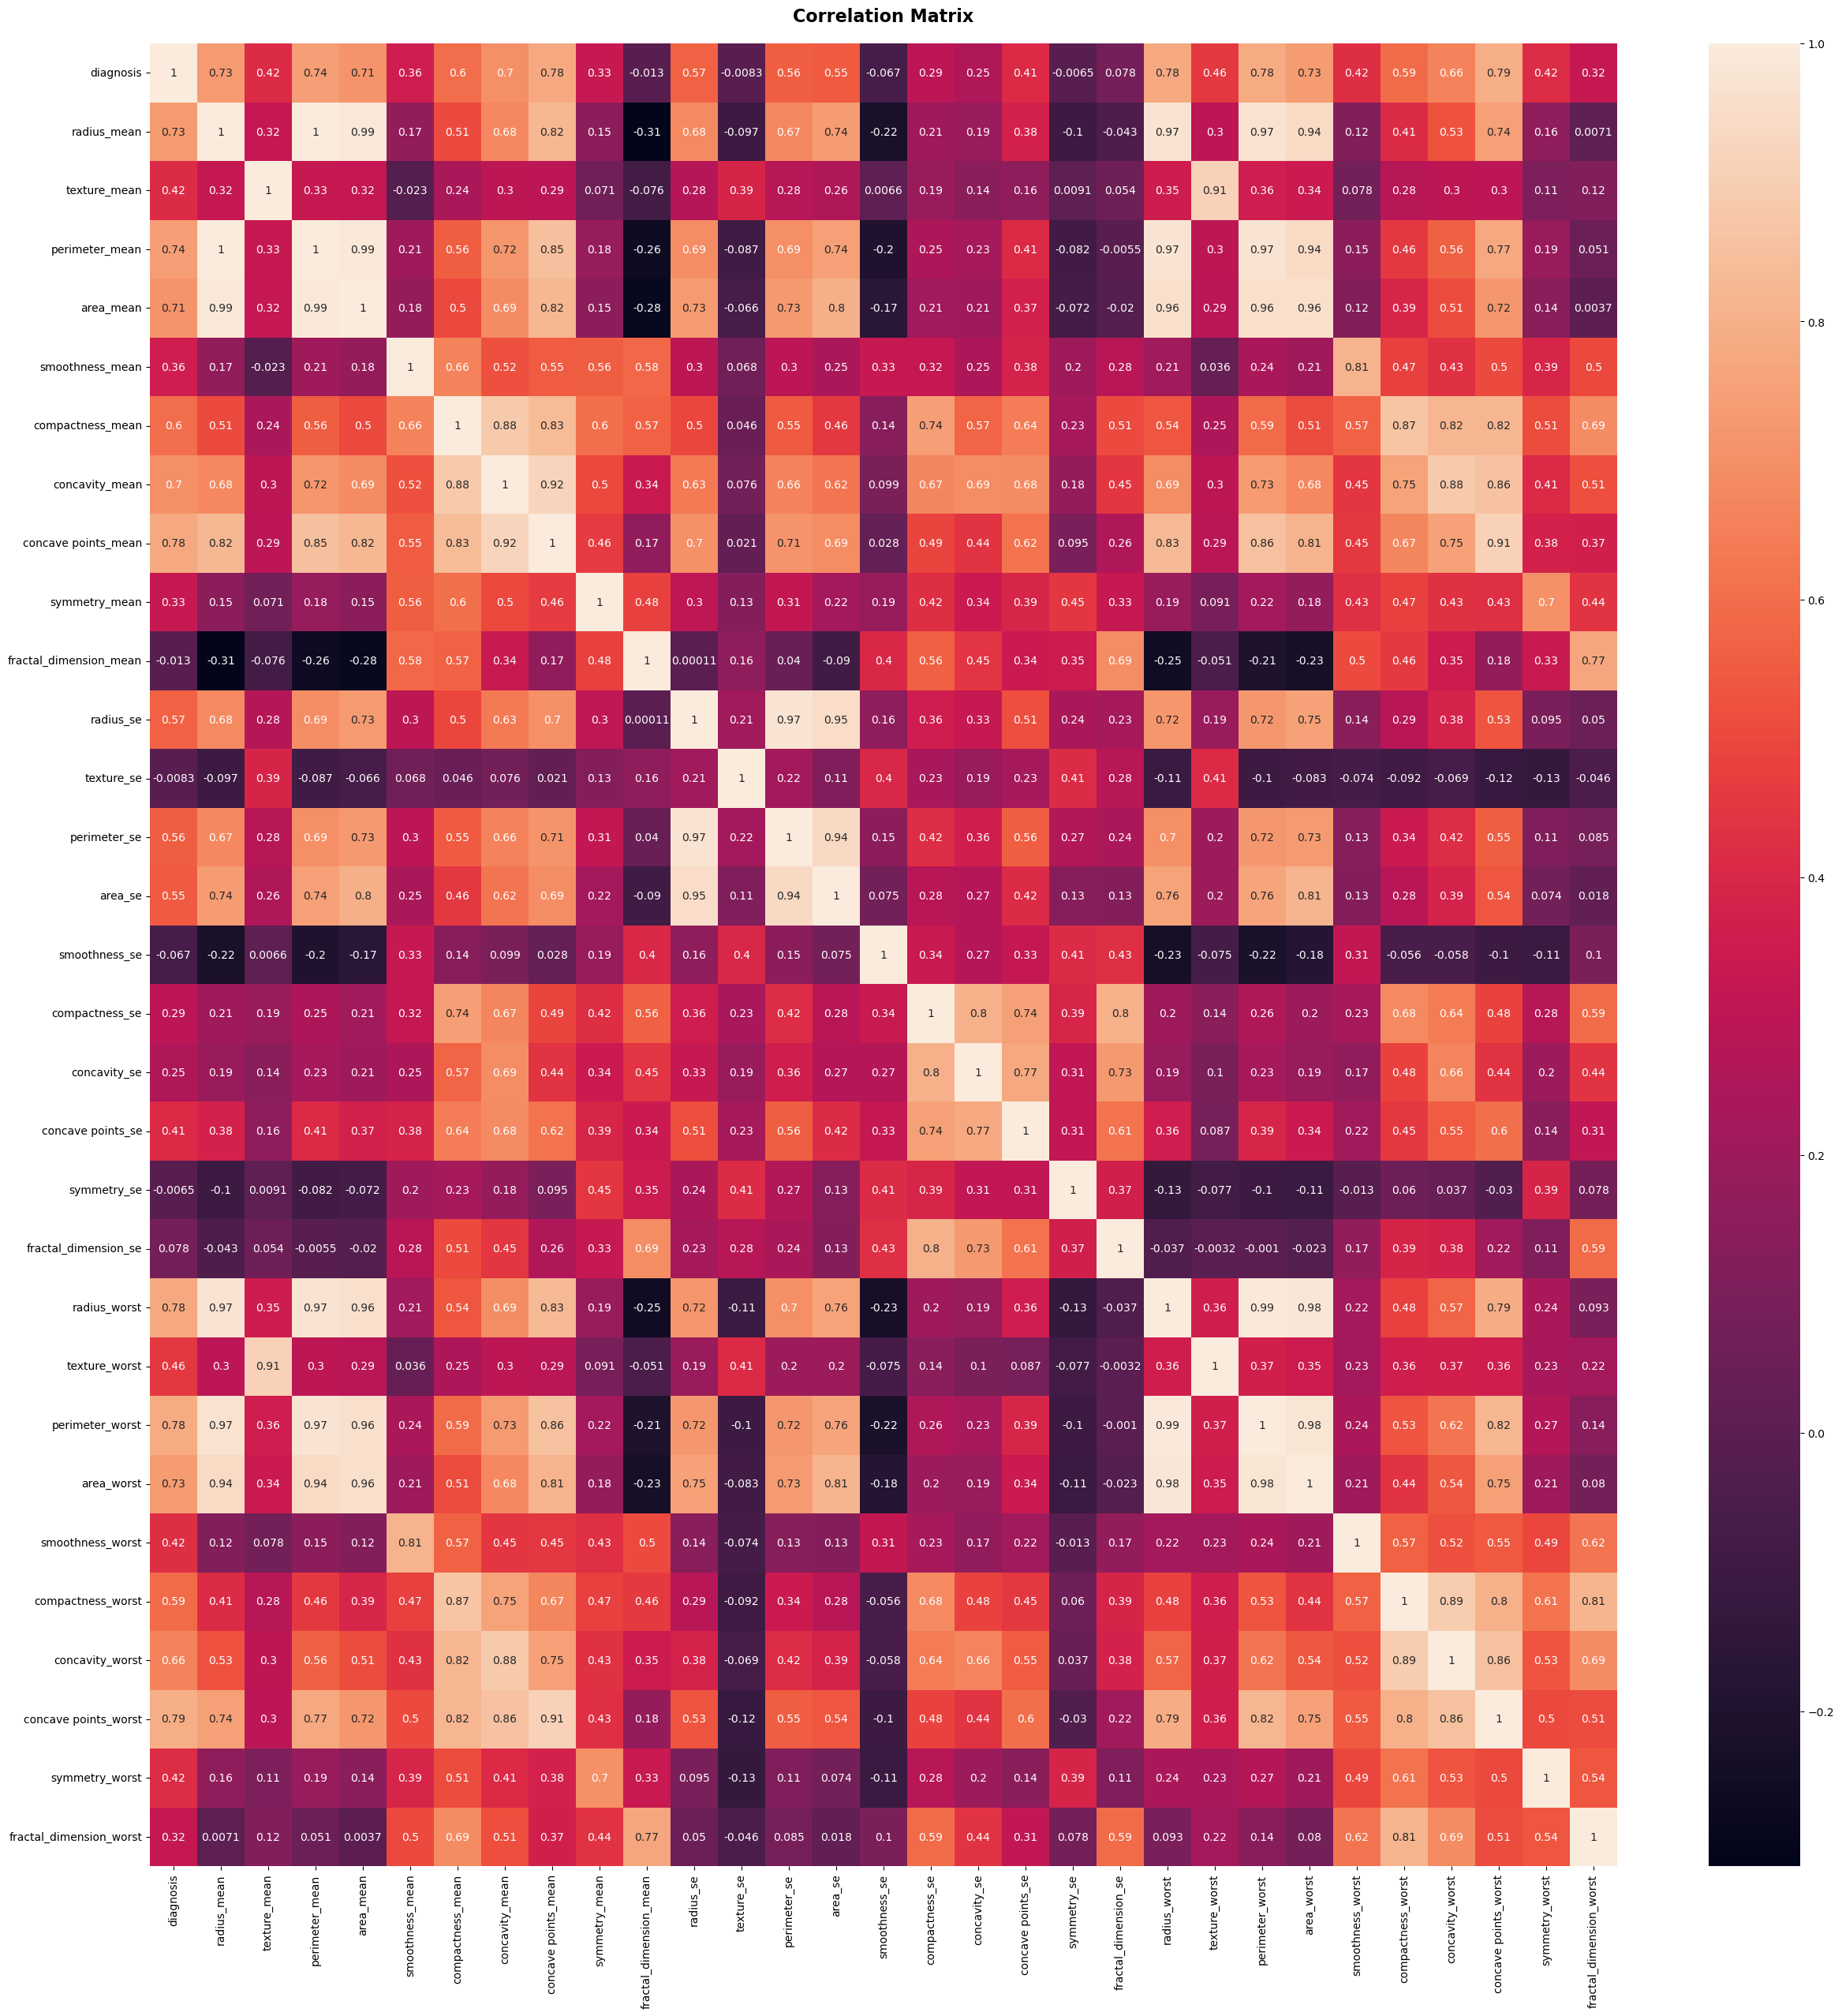

In [80]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
scaler=StandardScaler()
Xn_train=scaler.fit_transform(X_train)
Xn_test=scaler.transform(X_test)

# Model 1 : Logistic Regression

In [293]:
model1=LogisticRegression()
model1.fit(Xn_train,y_train)

y_pred1=model1.predict(Xn_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



**We choose recall as the most accurate metric for this problem 
as we want to detect as much as possible positive values.**

In [294]:
recall1=recall_score(y_test, y_pred1)
print(f"Recall Score: {recall1}")

Recall Score: 0.9841269841269841


Confusion Matrix (Test):
[[106   2]
 [  1  62]]


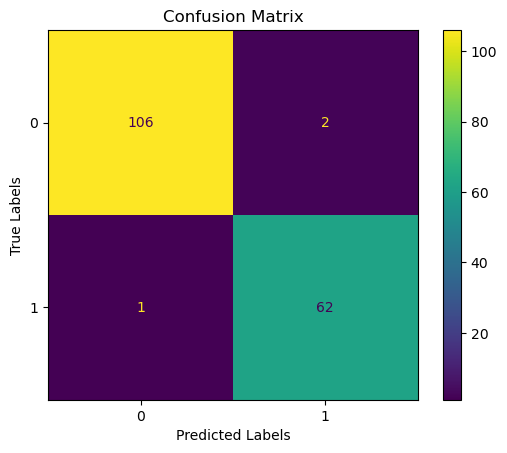

In [295]:
print("Confusion Matrix (Test):")
matrix1=confusion_matrix(y_test, y_pred1)
print(matrix1)
matrix1 =ConfusionMatrixDisplay(confusion_matrix=matrix1)
matrix1.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Changing some hyperparameters manually:**

**for different penalty/solver values :**

Recall Score of none : 0.9682539682539683


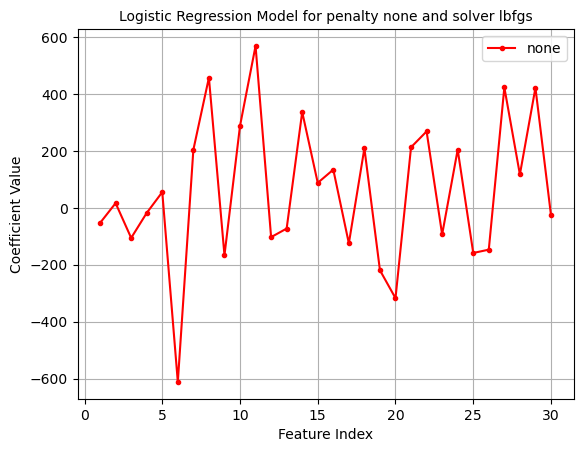

Recall Score of l1 : 0.9841269841269841


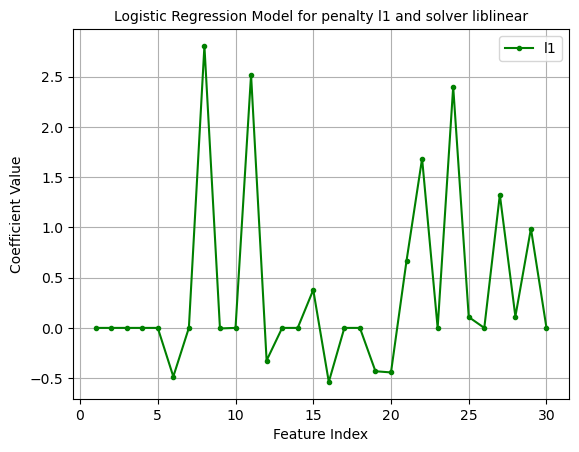

Recall Score of l2 : 0.9841269841269841


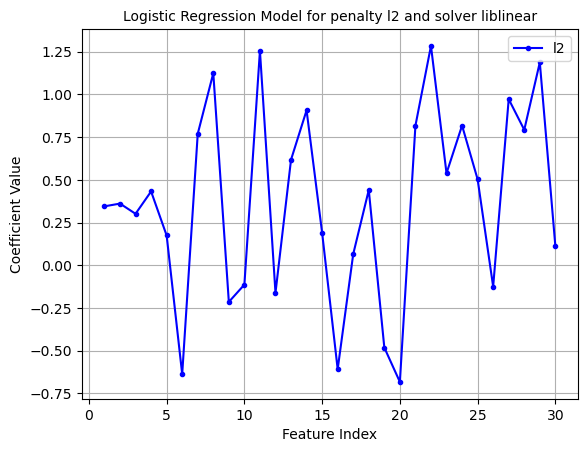

In [352]:
penalties=['none','l1','l2']
colors=['red','green','blue','orange']
solvers=['lbfgs','liblinear','liblinear']
for i,k,j in zip(penalties,colors,solvers):
    
    logreg_model1=LogisticRegression(penalty=i,solver=j)
    logreg_model1.fit(Xn_train,y_train)
    coe1_log = logreg_model1.coef_[0]   
    y_pred_log1=logreg_model1.predict(Xn_test)
    
    plt.plot(range(1,len(coe1_log)+1),coe1_log,'.-',color=k,label=i)    
    plt.legend() 
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'Logistic Regression Model for penalty {i} and solver {j}', fontsize=10)
    rec1_log=recall_score(y_test, y_pred_log1)
    print(f'Recall Score of {i} : {rec1_log}')
    plt.grid()
    plt.show()    

**for different "C" values :**

Recall Score of C=0.001 : 0.7301587301587301


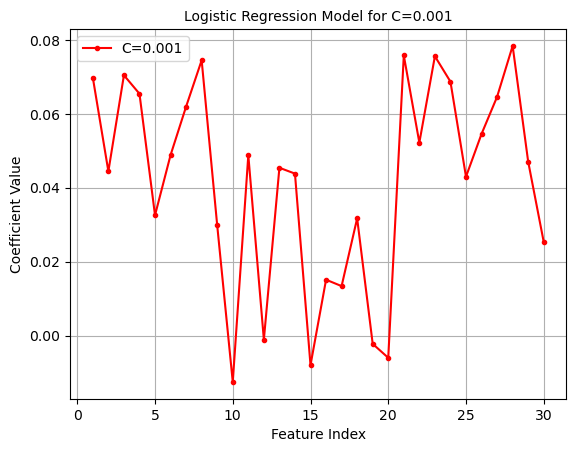

Recall Score of C=1 : 0.9841269841269841


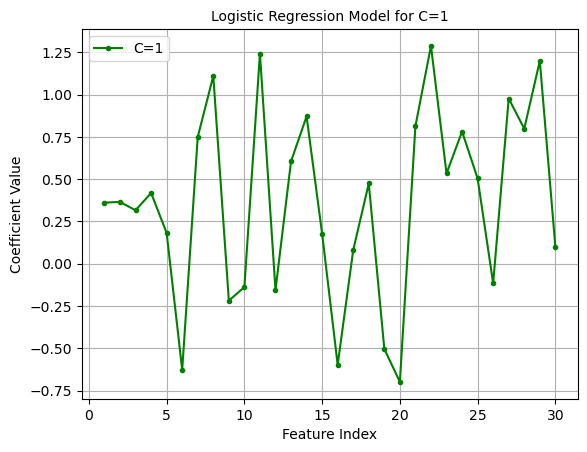

Recall Score of C=100 : 0.9841269841269841


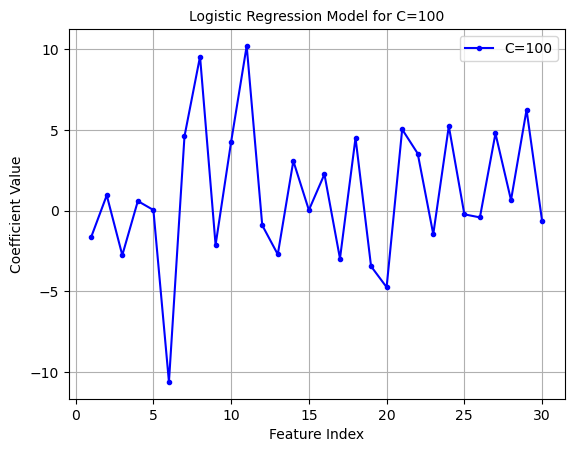

Recall Score of C=1000 : 0.9682539682539683


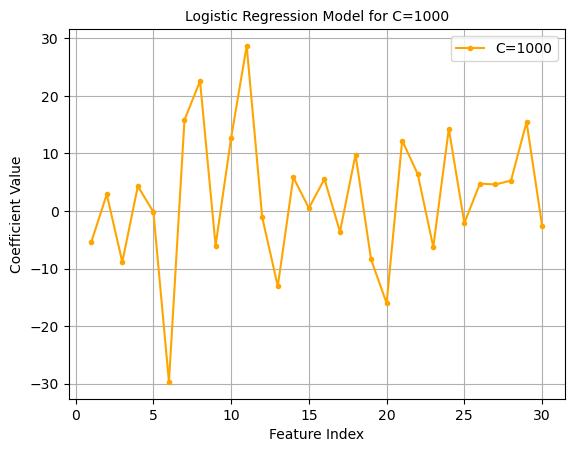

In [353]:
c_values = [0.001, 1, 100,1000]
colors = ['red','green','blue','orange']

for a,b in zip(colors,c_values):
    
    logreg_model2=LogisticRegression(C=b)
    logreg_model2.fit(Xn_train,y_train)
    coe2_log = logreg_model2.coef_[0]   
    y_pred_log2=logreg_model2.predict(Xn_test)
    
    plt.plot(range(1,len(coe2_log)+1),coe2_log,'.-',color=a,label=f'C={b}')     
    plt.legend()
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'Logistic Regression Model for C={b}', fontsize=10)
    rec2_log=recall_score(y_test, y_pred_log2)
    print(f'Recall Score of C={b} : {rec2_log}')
    
    
    plt.grid()
    plt.show()    

# ...to sum up the plots

Recall Score of none : 0.9682539682539683
Recall Score of l1 : 0.9841269841269841
Recall Score of l2 : 0.9841269841269841


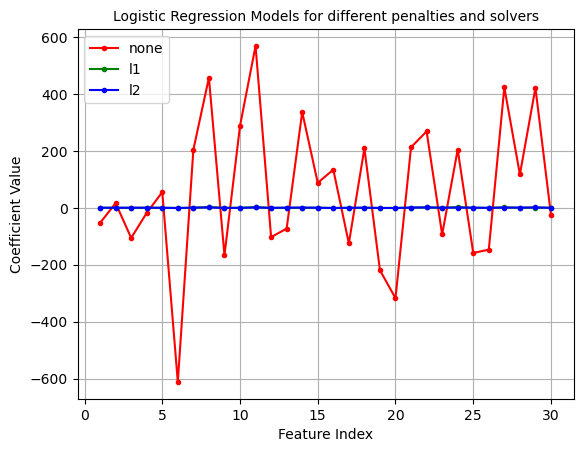

Recall Score of C=0.001 : 0.7301587301587301
Recall Score of C=1 : 0.9841269841269841
Recall Score of C=100 : 0.9841269841269841
Recall Score of C=1000 : 0.9682539682539683


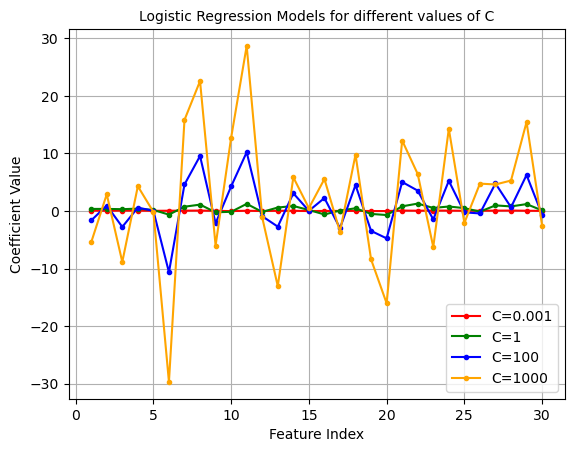

In [362]:
penalties=['none','l1','l2']
colors=['red','green','blue','orange']
solvers=['lbfgs','liblinear','liblinear']
for i,k,j in zip(penalties,colors,solvers):
    
    logreg_model1=LogisticRegression(penalty=i,solver=j)
    logreg_model1.fit(Xn_train,y_train)
    coe1_log = logreg_model1.coef_[0]   
    y_pred_log1=logreg_model1.predict(Xn_test)
    
    plt.plot(range(1,len(coe1_log)+1),coe1_log,'.-',color=k,label=i)    
    plt.legend() 
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title('Logistic Regression Models for different penalties and solvers', fontsize=10)
    rec1_log=recall_score(y_test, y_pred_log1)
    print(f'Recall Score of {i} : {rec1_log}')
plt.grid()
plt.show()   

c_values = [0.001, 1, 100,1000]
colors = ['red','green','blue','orange']

for a,b in zip(colors,c_values):
    
    logreg_model2=LogisticRegression(C=b)
    logreg_model2.fit(Xn_train,y_train)
    coe2_log = logreg_model2.coef_[0]   
    y_pred_log2=logreg_model2.predict(Xn_test)
    
    plt.plot(range(1,len(coe2_log)+1),coe2_log,'.-',color=a,label=f'C={b}')     
    plt.legend()
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title('Logistic Regression Models for different values of C', fontsize=10)
    rec2_log=recall_score(y_test, y_pred_log2)
    print(f'Recall Score of C={b} : {rec2_log}')
    
    
plt.grid()
plt.show() 

**ROC (AUC) curves**

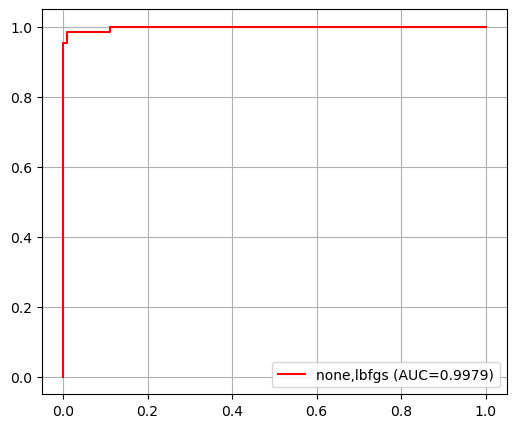

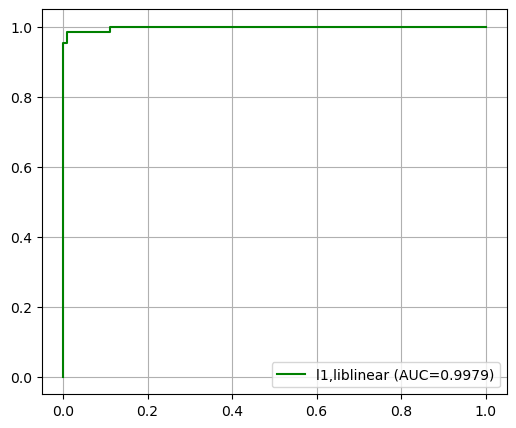

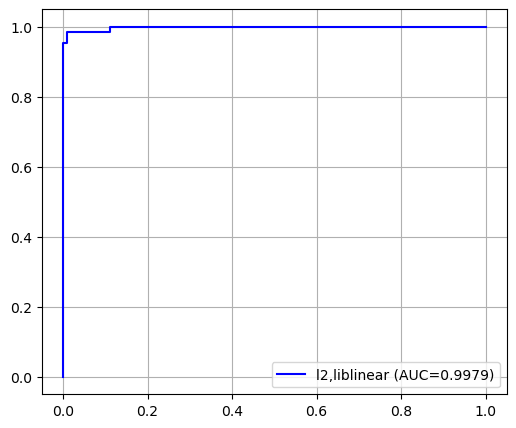

In [370]:
for c,penalty,solver in zip(colors,penalties,solvers):
    y_probs_log1 = logreg_model1.predict_proba(Xn_test)[:, 1]  
    fpr_log1, tpr_log1, _ = roc_curve(y_test, y_probs_log1)
    roc_auc_log1 = auc(fpr_log1, tpr_log1)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_log1, tpr_log1, color=c, label=f'{penalty},{solver} (AUC={roc_auc_log1:.4f})')
    plt.legend()
    plt.grid()
    plt.show

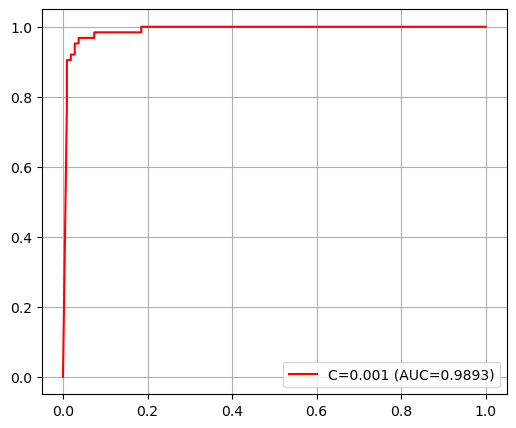

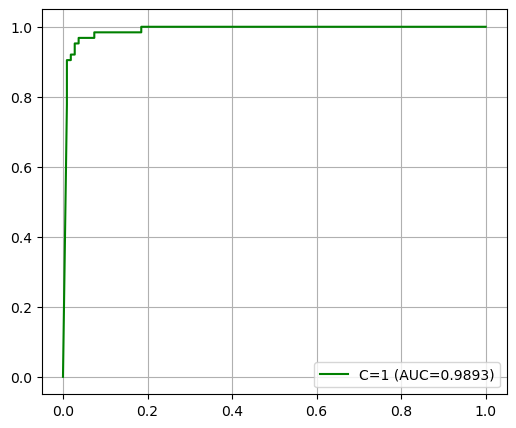

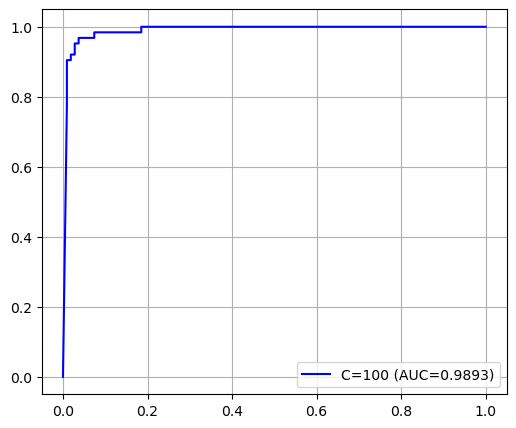

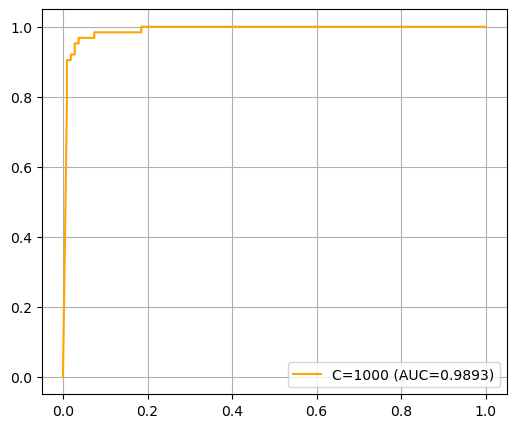

In [371]:
for c,c_val in zip(colors,c_values):
   
    y_probs_log2 = logreg_model2.predict_proba(Xn_test)[:, 1]  
    fpr_log2, tpr_log2, _ = roc_curve(y_test, y_probs_log2)
    roc_auc_log2 = auc(fpr_log2, tpr_log2)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_log2, tpr_log2, color=c, label=f'C={c_val} (AUC={roc_auc_log2:.4f})')
    plt.legend()
    plt.grid()
    plt.show

# Model 2 : Support Vector Machine (SVM)

In [372]:
model2=SVC()
model2.fit(Xn_train,y_train)

y_pred2=model2.predict(Xn_test)

print(classification_report(y_test, y_pred2))

recall2=recall_score(y_test, y_pred2)
print(f"Recall Score: {recall2}")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Recall Score: 0.9682539682539683


Confusion Matrix (Test):
[[106   2]
 [  2  61]]


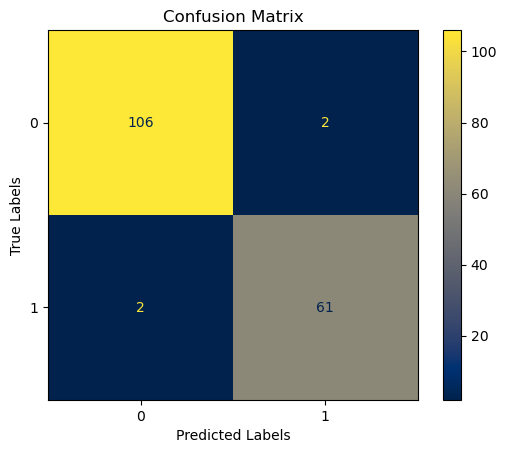

In [373]:
print("Confusion Matrix (Test):")
matrix2=confusion_matrix(y_test, y_pred2)
print(matrix2)
matrix2=ConfusionMatrixDisplay(confusion_matrix=matrix2)
matrix2.plot(cmap="cividis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Changing some hyperparameters manually:**

**at first we will change** ***"C"***

Recall Score of Linear : 0.873015873015873


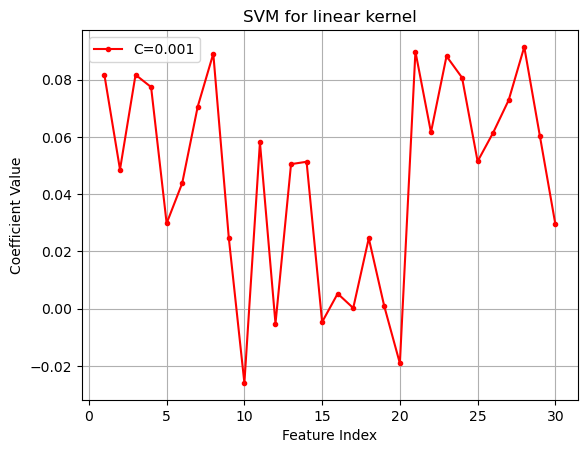

Recall Score of Linear : 0.9682539682539683


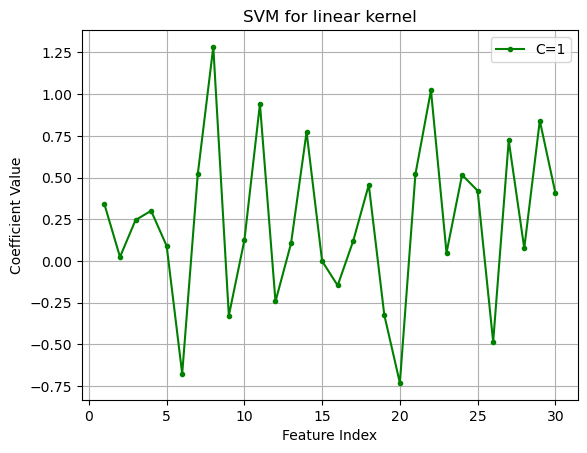

Recall Score of Linear : 0.9682539682539683


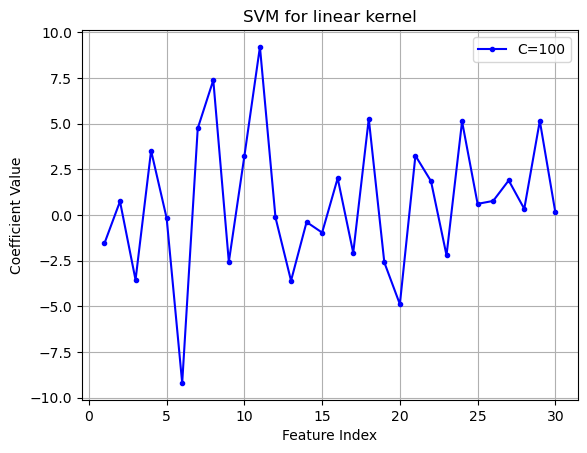

Recall Score of Linear : 0.9841269841269841


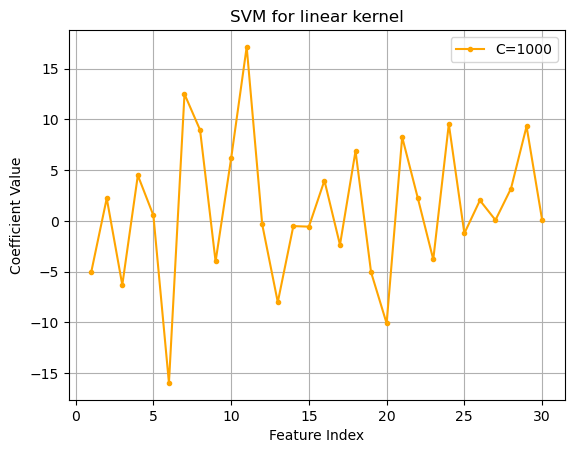

In [374]:
for c,c_val in zip(colors,c_values):
    
    svc_model1=SVC(kernel='linear',C=c_val, probability=True)
    svc_model1.fit(Xn_train,y_train)
    coe1_svc = svc_model1.coef_[0]   
    y_pred_svc1=svc_model1.predict(Xn_test)
    
    plt.plot(range(1,len(coe1_svc)+1),coe1_svc,'.-',color=c,label=f'C={c_val}')    
    plt.legend() 
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'SVM for {kernel} kernel', fontsize=12)
    rec1_svc=recall_score(y_test, y_pred_svc1)
    print(f'Recall Score of Linear : {rec1_svc}') 
    plt.grid()
    plt.show()    

**Summing up the above four curves in one plot :**

Recall Score of Linear : 0.873015873015873
Recall Score of Linear : 0.9682539682539683
Recall Score of Linear : 0.9682539682539683
Recall Score of Linear : 0.9841269841269841


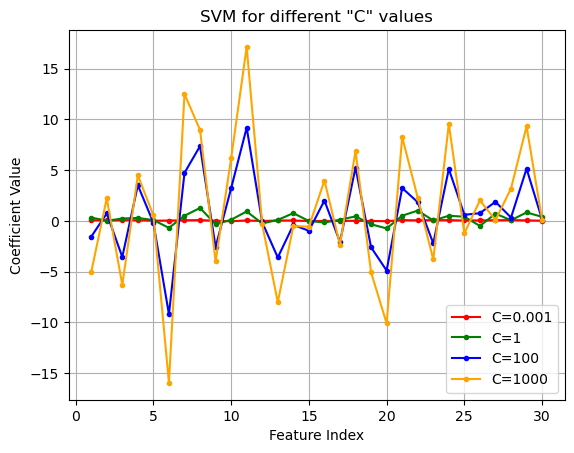

In [391]:
for c,c_val in zip(colors,c_values):
    
    svc_model1=SVC(kernel='linear',C=c_val, probability=True)
    svc_model1.fit(Xn_train,y_train)
    coe1_svc = svc_model1.coef_[0]   
    y_pred_svc1=svc_model1.predict(Xn_test)
    
    plt.plot(range(1,len(coe1_svc)+1),coe1_svc,'.-',color=c,label=f'C={c_val}')    
    plt.legend() 
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'SVM for different "C" values', fontsize=12)
    rec1_svc=recall_score(y_test, y_pred_svc1)
    print(f'Recall Score of Linear : {rec1_svc}') 
plt.grid()
plt.show()    

**roc curves for different "C" values:**

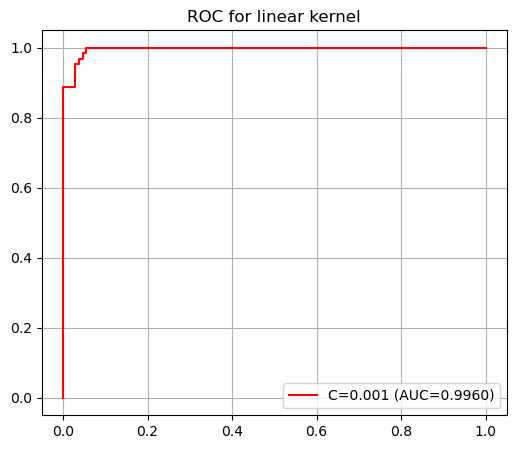

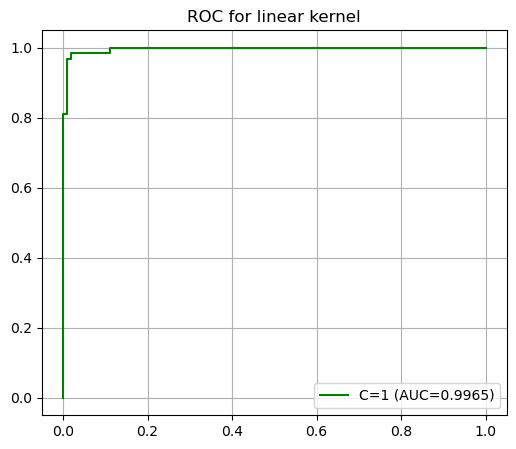

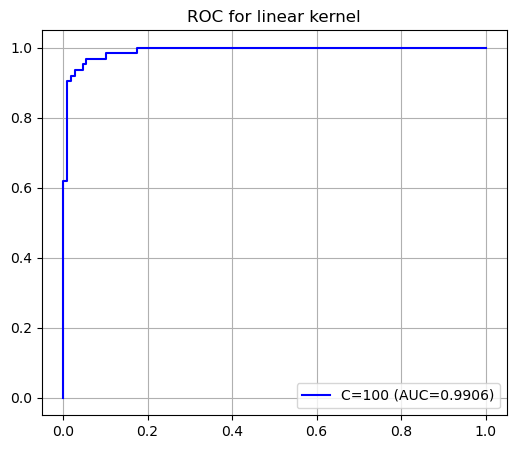

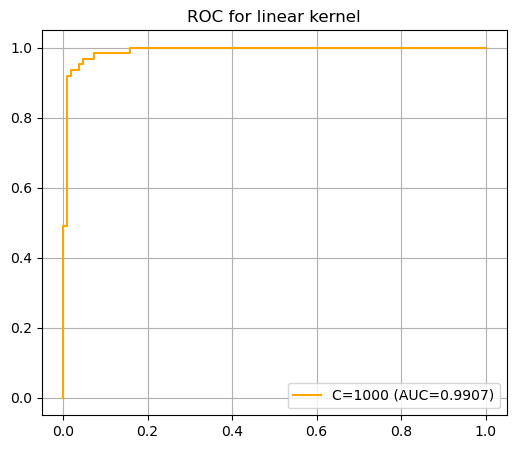

In [397]:
for c,c_val in zip(colors,c_values):
    svc_model1=SVC(kernel='linear',C=c_val, probability=True)
    svc_model1.fit(Xn_train,y_train)
    y_probs_svc1 = svc_model1.predict_proba(Xn_test)[:, 1]  
    fpr_svc1, tpr_svc1, _ = roc_curve(y_test, y_probs_svc1)
    roc_auc_svc1 = auc(fpr_svc1, tpr_svc1)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_svc1, tpr_svc1, color=c, label=f'C={c_val} (AUC={roc_auc_svc1:.4f})')
    plt.legend()
    plt.title('ROC for linear kernel')
    plt.grid()
    plt.show

**plotting the roc curves for different kernels:**

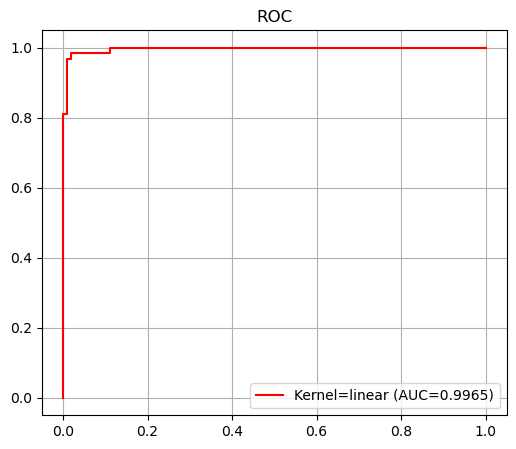

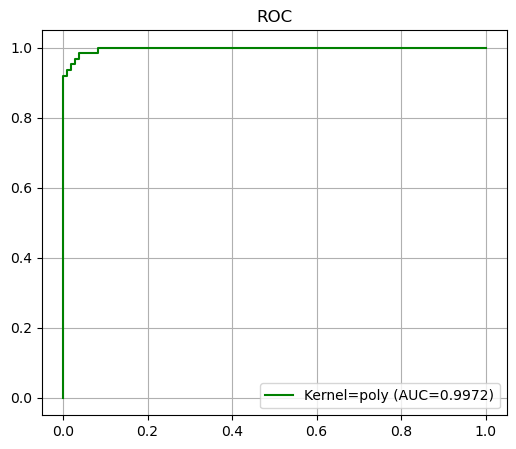

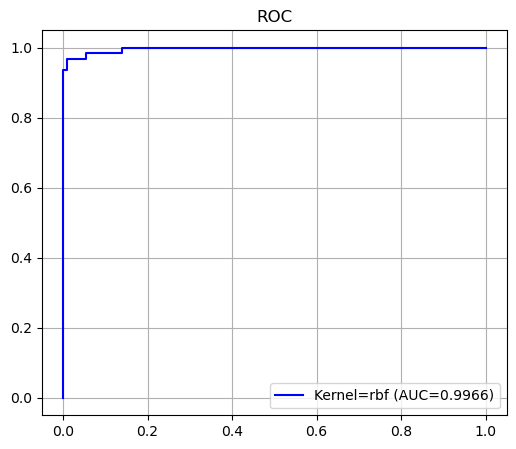

In [399]:
kernels=['linear', 'poly', 'rbf']
for c,kernel in zip(colors,kernels):
    svc_model2=SVC(kernel=kernel, probability=True)
    svc_model2.fit(Xn_train,y_train)
    y_probs_svc2 = svc_model2.predict_proba(Xn_test)[:, 1]  
    fpr_svc2, tpr_svc2, _ = roc_curve(y_test, y_probs_svc2)
    roc_auc_svc2 = auc(fpr_svc2, tpr_svc2)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_svc2, tpr_svc2, color=c, label=f'Kernel={kernel} (AUC={roc_auc_svc2:.4f})')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show